<a href="https://colab.research.google.com/github/shailjam14/codsoft/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 98% 160M/163M [00:02<00:00, 82.8MB/s]
100% 163M/163M [00:02<00:00, 70.7MB/s]


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
from zipfile import ZipFile
dataset="/content/face-mask-dataset.zip"
with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("the dataset is extracted")

the dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  sample_data


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [8]:
with_mask_files=os.listdir("/content/data/with_mask")
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2992.jpg', 'with_mask_2323.jpg', 'with_mask_3448.jpg', 'with_mask_2217.jpg', 'with_mask_2864.jpg']
['with_mask_3174.jpg', 'with_mask_3494.jpg', 'with_mask_3340.jpg', 'with_mask_647.jpg', 'with_mask_3612.jpg']


In [9]:
without_mask_files=os.listdir("/content/data/without_mask")
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1537.jpg', 'without_mask_2118.jpg', 'without_mask_2758.jpg', 'without_mask_1640.jpg', 'without_mask_88.jpg']
['without_mask_2921.jpg', 'without_mask_1684.jpg', 'without_mask_3227.jpg', 'without_mask_2585.jpg', 'without_mask_590.jpg']


In [10]:
print("no of with mask images",len(with_mask_files))
print("no of without mask images",len(without_mask_files))

no of with mask images 3725
no of without mask images 3828


In [11]:
# with mask -->1
# with_out mask -->0

In [12]:
with_mask_labels=[1]*3828
without_mask_labels=[0]*3828

In [13]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3828
3828


In [15]:
labels=with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7656
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


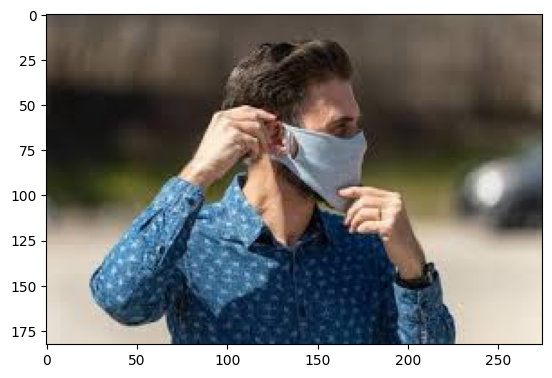

In [16]:
img=mpimg.imread("/content/data/with_mask/with_mask_2590.jpg")
imgplot=plt.imshow(img)
plt.show()

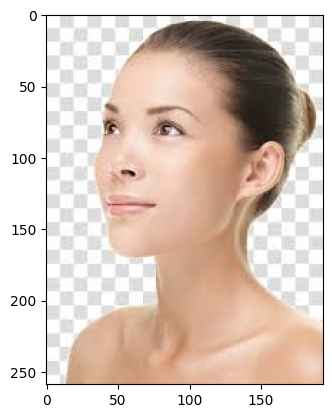

In [17]:
img=mpimg.imread("/content/data/without_mask/without_mask_2925.jpg")
imgplot=plt.imshow(img)
plt.show()

In [18]:
with_mask_path="/content/data/with_mask/"
data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert("RGB")
  image=np.array(image)
  data.append(image)

without_mask_path="/content/data/without_mask/"

for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert("RGB")
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
type(data)

list

In [20]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
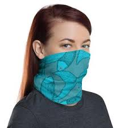

In [21]:
data[0]

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
x=np.array(data)
y=np.array(labels)

In [24]:
type(x)

numpy.ndarray

In [25]:
type(y)

numpy.ndarray

In [26]:
print(x.shape)

(7553, 128, 128, 3)


In [27]:
print(y.shape)

(7656,)


In [28]:
x

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [29]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [30]:
y=y[:x.shape[0]]


In [31]:
print(f"x shape:{x.shape}")
print(f"y shape:{y.shape}")

x shape:(7553, 128, 128, 3)
y shape:(7553,)


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [33]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [34]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [35]:
x_train_scaled[0]

array([[[0.14509804, 0.14117647, 0.12156863],
        [0.1372549 , 0.1254902 , 0.10980392],
        [0.12156863, 0.10196078, 0.08627451],
        ...,
        [0.24705882, 0.23137255, 0.21960784],
        [0.23529412, 0.21960784, 0.21176471],
        [0.22352941, 0.20784314, 0.20392157]],

       [[0.13333333, 0.12941176, 0.10980392],
        [0.12941176, 0.12156863, 0.10196078],
        [0.1254902 , 0.10588235, 0.09019608],
        ...,
        [0.25098039, 0.23529412, 0.22352941],
        [0.24313725, 0.22745098, 0.21960784],
        [0.23137255, 0.21568627, 0.21176471]],

       [[0.12156863, 0.11764706, 0.09803922],
        [0.12156863, 0.11372549, 0.09411765],
        [0.12941176, 0.10980392, 0.09411765],
        ...,
        [0.25098039, 0.23529412, 0.21960784],
        [0.25098039, 0.23529412, 0.23137255],
        [0.24313725, 0.22745098, 0.22352941]],

       ...,

       [[0.18039216, 0.16078431, 0.1372549 ],
        [0.18823529, 0.16862745, 0.14509804],
        [0.17647059, 0

In [36]:
import tensorflow

In [37]:
from tensorflow import keras

In [38]:
num_of_classes=1
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes,activation="sigmoid"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [40]:
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 161s 937ms/step - accuracy: 0.7543 - loss: 0.6458 - val_accuracy: 0.8793 - val_loss: 0.2973
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 202s 934ms/step - accuracy: 0.8806 - loss: 0.3023 - val_accuracy: 0.9207 - val_loss: 0.2322
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 158s 929ms/step - accuracy: 0.9013 - loss: 0.2446 - val_accuracy: 0.9091 - val_loss: 0.2570
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 202s 934ms/step - accuracy: 0.9350 - loss: 0.1848 - val_accuracy: 0.9140 - val_loss: 0.2221
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 204s 947ms/step - accuracy: 0.9413 - loss: 0.1615 - val_accuracy: 0.9025 - val_loss: 0.2585


In [41]:
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print(accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 235ms/step - accuracy: 0.9224 - loss: 0.2437
0.9159497022628784


image to be predicted/content/20230630_202356.jpg


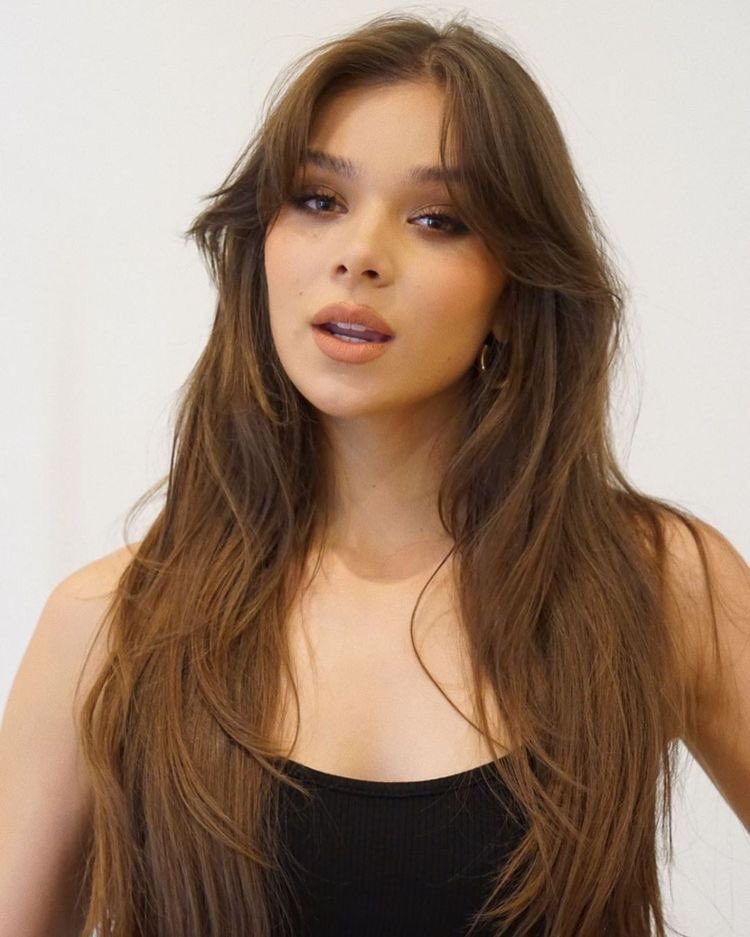

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.99582493]]
0
not wearing mask


In [44]:
input_image_path=input("image to be predicted")
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label==1:
  print("the person is  wearing mask")
else:
  print("not wearing mask")